In [1]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np

def read_dicom_series(directory):
    reader = sitk.ImageSeriesReader()
    dicom_names = reader.GetGDCMSeriesFileNames(directory)
    reader.SetFileNames(dicom_names)
    image = reader.Execute()
    return image

# Update the paths to the directories containing your DICOM series
primary_ct_directory = r'D:\CTH_archive\PN1'
tmax_overlay_directory = r'D:\CTH_archive\TEST_TMAX'

primary_ct_image = read_dicom_series(primary_ct_directory)
tmax_overlay_image = read_dicom_series(tmax_overlay_directory)


Shape: (23, 286, 256, 3)


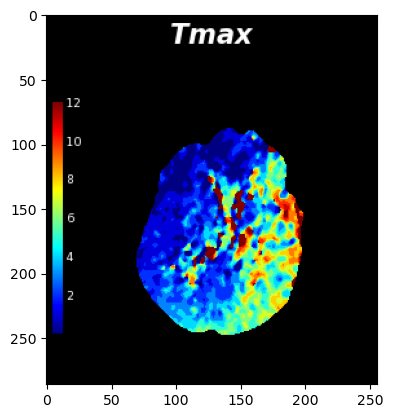

In [78]:
tmax_overlay_np = sitk.GetArrayFromImage(tmax_overlay_image)
random_slice = 15
plt.imshow(tmax_overlay_np[random_slice, :, :])
print("Shape:", tmax_overlay_np.shape)

Shape: (23, 256, 256, 3)


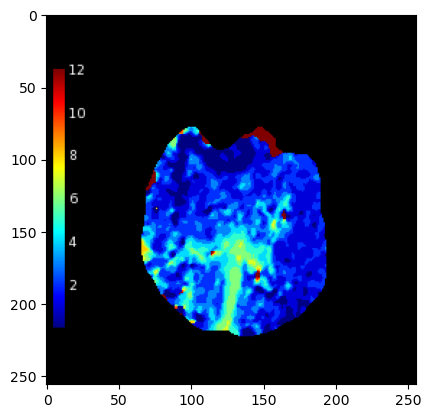

In [79]:
cropped_tmax_overlay_np = tmax_overlay_np[:, 30:, :]
selected_slice = 11
plt.imshow(cropped_tmax_overlay_np[selected_slice, :, :])
print("Shape:", cropped_tmax_overlay_np.shape)

New Spacing: (0.5, 0.5, 1.0)
New Origin: (0.0, 0.0, 0.0)
New Size: (512, 512, 23)


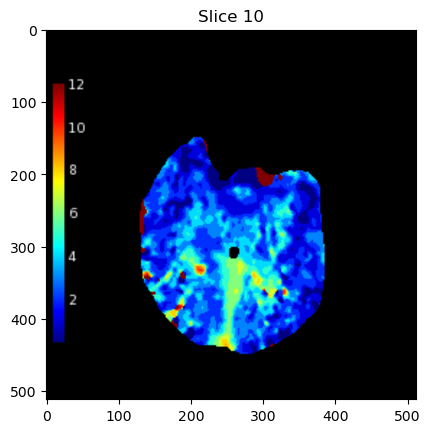

Spacing: (0.5, 0.5, 1.0)
Direction: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
Origin: (0.0, 0.0, 0.0)
Size: (512, 512, 23)


In [111]:
cropped_tmax_overlay = sitk.GetImageFromArray(cropped_tmax_overlay_np)

#desired_spacing = (0.429688, 0.429688, 5.0)
desired_spacing = (0.5, 0.5, 1)
desired_origin = (0, 0, 0)
desired_size = (512, 512, 23)  # Note: Changing size might require resampling

# Create a new image with the desired properties
new_image = sitk.Image(desired_size, cropped_tmax_overlay.GetPixelID())
new_image.SetSpacing(desired_spacing)
new_image.SetOrigin(desired_origin)
new_image.SetDirection(cropped_tmax_overlay.GetDirection())  # Keeping the original direction

# To adjust the size, you might need to resample the original image
resampler = sitk.ResampleImageFilter()
resampler.SetReferenceImage(new_image)  # Use the new image as reference for its properties
resampler.SetInterpolator(sitk.sitkLinear)  # Choose an interpolation method
resampler.SetTransform(sitk.Transform())  # Use identity transform

# Resample the original image
resampled_image = resampler.Execute(cropped_tmax_overlay)

# Now 'resampled_image' has the desired spacing, origin, and size
# You can check the properties to confirm
print("New Spacing:", resampled_image.GetSpacing())
print("New Origin:", resampled_image.GetOrigin())
print("New Size:", resampled_image.GetSize())

resampled_image_np = sitk.GetArrayFromImage(resampled_image)

# Select a slice to display, for example, the middle slice in the Z dimension
slice_index = 10
selected_slice = resampled_image_np[slice_index, :, :]

# Display the selected slice using matplotlib
plt.imshow(selected_slice)
plt.title(f'Slice {slice_index}')
plt.show()


spacing = resampled_image.GetSpacing()  # Spacing between pixels/voxels in each dimension
direction = resampled_image.GetDirection()  # Direction cosine matrix
origin = resampled_image.GetOrigin()  # The x, y, z coordinates of the image origin
size = resampled_image.GetSize()  # Number of pixels/voxels in each dimension

# Print the information
print("Spacing:", spacing)
print("Direction:", direction)
print("Origin:", origin)
print("Size:", size)

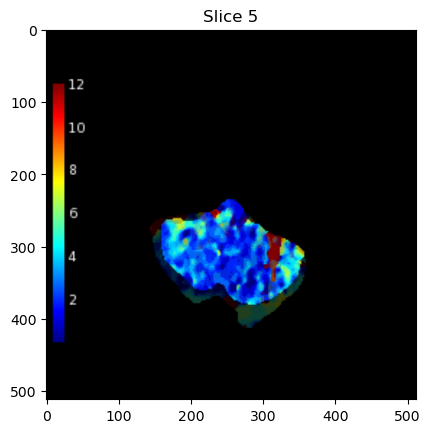

Spacing: (0.5, 0.5, 0.25)
Direction: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
Origin: (0.0, 0.0, 0.0)
Size: (512, 512, 23)


In [107]:
resampled_image_np = sitk.GetArrayFromImage(resampled_image)

# Select a slice to display, for example, the middle slice in the Z dimension
slice_index = 5
selected_slice = resampled_image_np[slice_index, :, :]

# Display the selected slice using matplotlib
plt.imshow(selected_slice)
plt.title(f'Slice {slice_index}')
plt.show()


spacing = resampled_image.GetSpacing()  # Spacing between pixels/voxels in each dimension
direction = resampled_image.GetDirection()  # Direction cosine matrix
origin = resampled_image.GetOrigin()  # The x, y, z coordinates of the image origin
size = resampled_image.GetSize()  # Number of pixels/voxels in each dimension

# Print the information
print("Spacing:", spacing)
print("Direction:", direction)
print("Origin:", origin)
print("Size:", size)

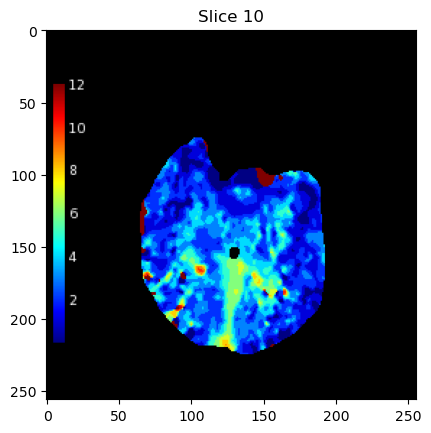

Spacing: (1.0, 1.0, 1.0)
Direction: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
Origin: (0.0, 0.0, 0.0)
Size: (256, 256, 23)


In [95]:

# Select a slice to display, for example, the middle slice in the Z dimension
slice_index = cropped_tmax_overlay_np.shape[0] // 2
slice_index = 10
selected_slice = cropped_tmax_overlay_np[slice_index, :, :]

# Display the selected slice using matplotlib
plt.imshow(selected_slice, cmap='gray')
plt.title(f'Slice {slice_index}')
plt.show()

cropped_tmax_overlay = sitk.GetImageFromArray(cropped_tmax_overlay_np)

spacing = cropped_tmax_overlay.GetSpacing()  # Spacing between pixels/voxels in each dimension
direction = cropped_tmax_overlay.GetDirection()  # Direction cosine matrix
origin = cropped_tmax_overlay.GetOrigin()  # The x, y, z coordinates of the image origin
size = cropped_tmax_overlay.GetSize()  # Number of pixels/voxels in each dimension

# Print the information
print("Spacing:", spacing)
print("Direction:", direction)
print("Origin:", origin)
print("Size:", size)

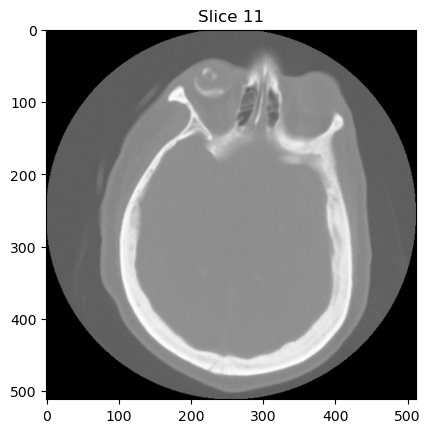

Spacing: (0.429688, 0.429688, 5.0)
Direction: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
Origin: (-105.3, -116.7, -49.75)
Size: (512, 512, 23)


In [15]:
primary_ct_image_np = sitk.GetArrayFromImage(primary_ct_image)

# Select a slice to display, for example, the middle slice in the Z dimension
slice_index = primary_ct_image_np.shape[0] // 2
selected_slice = primary_ct_image_np[slice_index, :, :]

# Display the selected slice using matplotlib
plt.imshow(selected_slice, cmap='gray')
plt.title(f'Slice {slice_index}')
plt.show()

spacing = primary_ct_image.GetSpacing()  # Spacing between pixels/voxels in each dimension
direction = primary_ct_image.GetDirection()  # Direction cosine matrix
origin = primary_ct_image.GetOrigin()  # The x, y, z coordinates of the image origin
size = primary_ct_image.GetSize()  # Number of pixels/voxels in each dimension

# Print the information
print("Spacing:", spacing)
print("Direction:", direction)
print("Origin:", origin)
print("Size:", size)

In [3]:
# Get the size and spacing of the primary CT image
primary_size = primary_ct_image.GetSize()
primary_spacing = primary_ct_image.GetSpacing()

# Calculate the new spacing for the Tmax overlay to match the primary CT size
overlay_new_spacing = [osz*ospz/psz for osz, ospz, psz in zip(tmax_overlay_image.GetSize(), tmax_overlay_image.GetSpacing(), primary_size)]

# Resample the Tmax overlay to match the primary CT size
resample_filter = sitk.ResampleImageFilter()
resample_filter.SetSize(primary_size)
resample_filter.SetOutputSpacing(overlay_new_spacing)
resample_filter.SetInterpolator(sitk.sitkLinear)
resample_filter.SetOutputDirection(primary_ct_image.GetDirection())
resample_filter.SetOutputOrigin(primary_ct_image.GetOrigin())

# Execute the resampling
resized_tmax_overlay = resample_filter.Execute(tmax_overlay_image)


In [4]:
# Define the ROI to exclude text; you'll need to adjust these values based on your images
x, y, width, height = 0, 50, primary_size[0], primary_size[1] - 50  # Assuming text is at the top

# Crop the image
cropped_tmax_overlay = resized_tmax_overlay[:, y:y+height, :]


In [5]:
# Save the processed Tmax overlay
sitk.WriteImage(cropped_tmax_overlay, r'D:\CTH_archive\resized_overlay.dcm')


In [6]:
# Convert the SimpleITK image to a NumPy array
cropped_tmax_overlay_np = sitk.GetArrayFromImage(cropped_tmax_overlay)


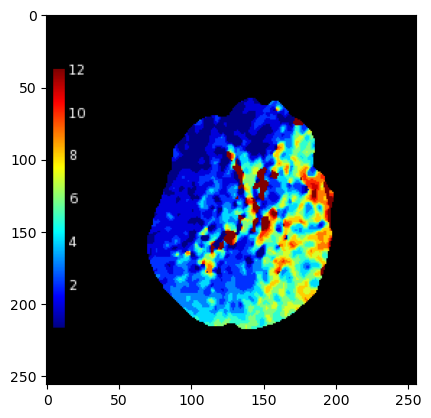

In [7]:
tmax_overlay_np = sitk.GetArrayFromImage(tmax_overlay_image)
cropped_tmax_overlay_np = tmax_overlay_np[:, 30:, :]
plt.imshow(cropped_tmax_overlay_np[15, :, :], cmap='gray')

In [8]:
from scipy.ndimage import zoom
import numpy as np

# Initialize the array to hold the resized slices
resized_slices = np.empty((cropped_tmax_overlay_np.shape[0], 512, 512, 3), dtype=cropped_tmax_overlay_np.dtype)

for i in range(cropped_tmax_overlay_np.shape[0]):  # Loop through slices
    for c in range(cropped_tmax_overlay_np.shape[3]):  # Loop through channels
        # Apply zoom to each channel of the slice
        resized_slices[i, :, :, c] = zoom(cropped_tmax_overlay_np[i, :, :, c], (512 / 256, 512 / 256), order=3)

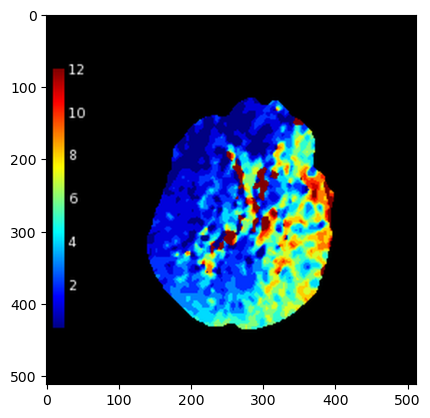

In [9]:
plt.imshow(resized_slices[15, :, :])